In [12]:
import numpy as np
import pandas as pd
import pickle
import os
import warnings
#mport settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font = 'IPAexGothic')
%matplotlib inline
pd.options.display.max_columns = None

plt.style.use('ggplot')
font = {'family' : 'meiryo'}

In [2]:
#選手一覧データの読み込み
df = pd.read_pickle('C:/Users/kurotsu-mayumi/Anaconda3/analysis_bb_gold/pickles_alt/player_info8.pkl')

In [3]:
df.shape

(924, 44)

In [4]:
df.columns

Index(['背番号', '選手名', '守備', '生年月日', '年齢', 'プロ年数', '身長', '体重', '血液型', '投打',
       '出身地', '推定年俸(万円)', '2019年所属球団', '生年年', '生年月', '生年日', '選手名_球団',
       '選手名_生年月日', '出場試合数', '出身地域', '出身校', '高・大フラグ', 'オリックス', 'ソフトバンク', 'ヤクルト',
       'ロッテ', '中日', '巨人', '広島', '日ハム', '楽天', '横浜', '西武', '阪神',
       '直近10年間月間MVP受賞回数', '直近10年間GG受賞回数', '最大所属年数', '最大所属年数球団', 'ネックレス太さ',
       '目的変数_ネックレス装着フラグ', '外国人フラグ', '育成', '2019年セパフラグ', '最大所属年数球団_adj'],
      dtype='object')

### 分析対象選手を絞る

In [5]:
#外国人選手を除外
df_1 = df[df["外国人フラグ"] == '国内']
df_1.shape

(827, 44)

In [6]:
#育成選手を除外
df_2 = df_1[~(df_1["育成"] =='育成')]
df_2.shape

(738, 44)

In [7]:
#育成以外で出場試合試合数が0の選手を除外
df_3 = df_2[~(df_2['出場試合数'] == 0)]
df_3.shape

(606, 44)

In [8]:
#パリーグに絞る
df_4 = df_3[df_3['2019年セパフラグ']=='パリーグ']
df_4.shape

(307, 44)

### 分析対象選手全体における金のネックレスをしている割合を出す

In [9]:
purity = len(df_4[df_4['目的変数_ネックレス装着フラグ']==1])/len(df_4)
purity

0.14006514657980457

In [10]:
df_test = df_4.groupby('2019年所属球団')[['目的変数_ネックレス装着フラグ']].mean()
df_test['Lift'] = df_test['目的変数_ネックレス装着フラグ']/purity
df_test['size'] = df_4['2019年所属球団'].value_counts()
df_test['t_count'] = df_4.groupby('2019年所属球団')['目的変数_ネックレス装着フラグ'].sum()
df_test = df_test.reset_index()
df_test

,2019年所属球団,目的変数_ネックレス装着フラグ,Lift,size,t_count
0,オリックス,0.178571,1.274917,56,10.0
1,ソフトバンク,0.269231,1.922182,52,14.0
2,ロッテ,0.106383,0.759525,47,5.0
3,日ハム,0.078431,0.559964,51,4.0
4,楽天,0.056604,0.404125,53,3.0
5,西武,0.145833,1.041182,48,7.0


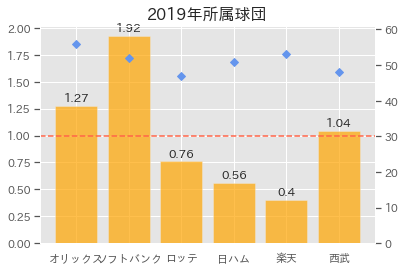

In [13]:
#グラフにする
warnings.simplefilter('ignore')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(df_test['2019年所属球団'], df_test['Lift'], alpha = 0.7, color = 'orange')
ax.axhline(1, ls = "--", color = "tomato")

for p, label in zip(ax.patches, df_test['Lift'].round(2)):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height+0.02 , label,
            ha='center', va='bottom', fontsize = 12)
ax.set_title('2019年所属球団', fontsize = 16)

ax2 = ax.twinx()
#ax2 = plt.axes()
ax2.plot(df_test['2019年所属球団'], df_test['size'], marker = "D", markerfacecolor = 'cornflowerblue', markeredgecolor = 'cornflowerblue', linewidth = 0)
ax2.set_ylim([0, max(df_test['size']+5)])
ax2.grid(False)

### カテゴリ変数：各カテゴリのリフト値を算出

In [14]:
df_ctg = df_4[['守備', '血液型', '投打', '出身地', '生年月','出身地域', '出身校', '高・大フラグ','最大所属年数球団_adj','直近10年間月間MVP受賞回数',
       '直近10年間GG受賞回数']]

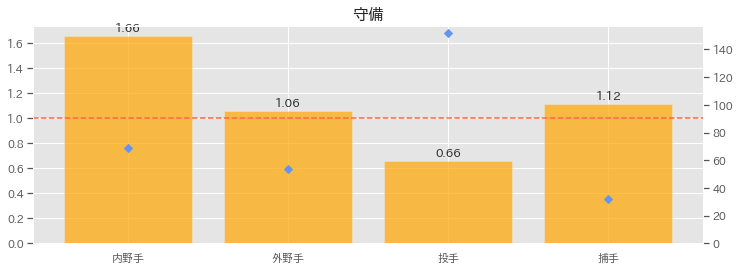

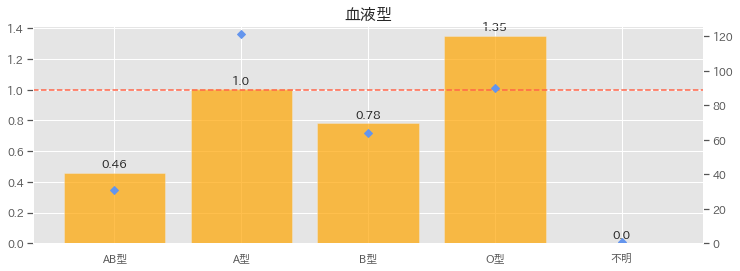

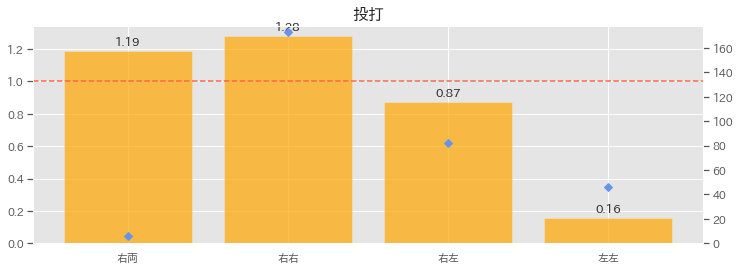

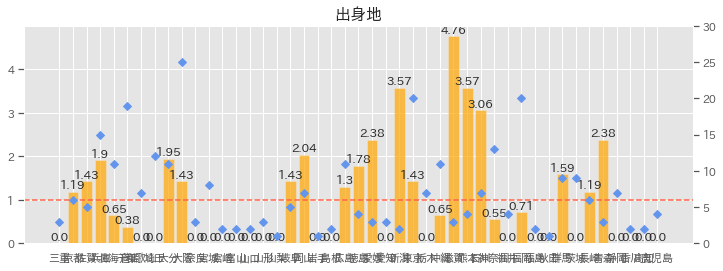

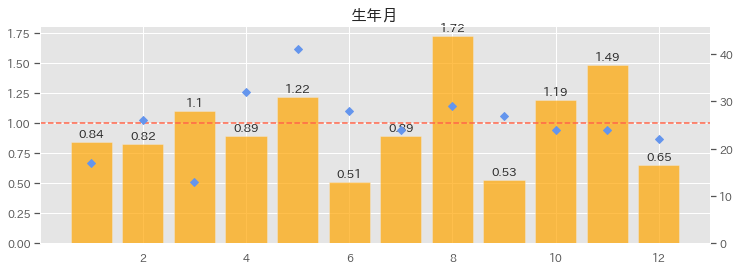

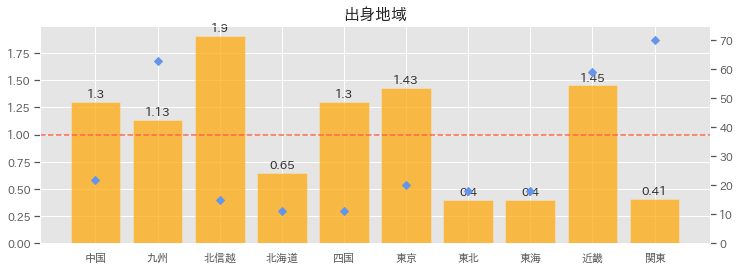

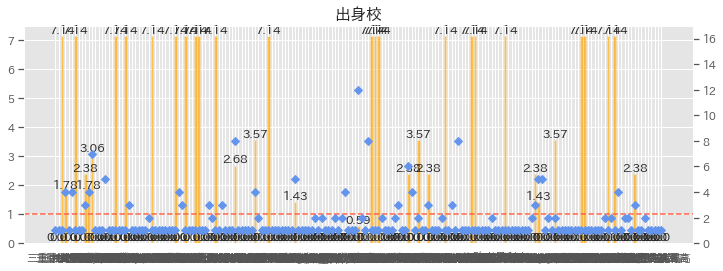

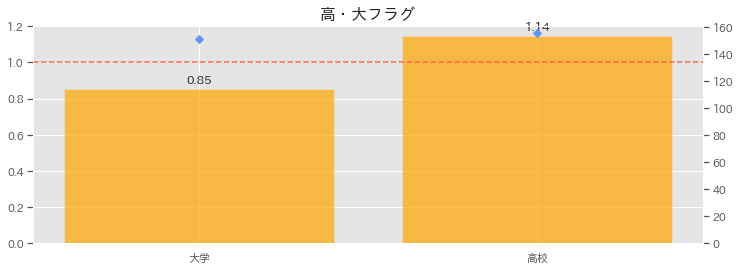

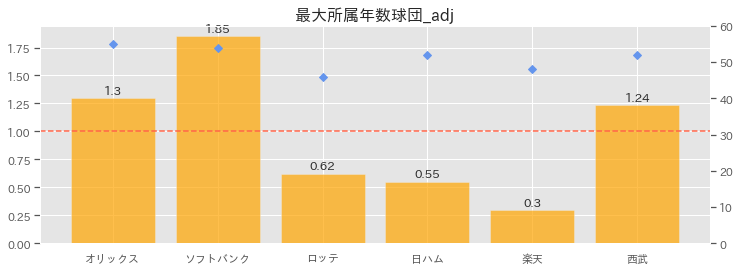

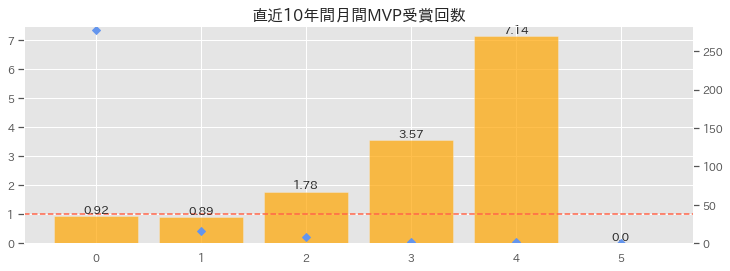

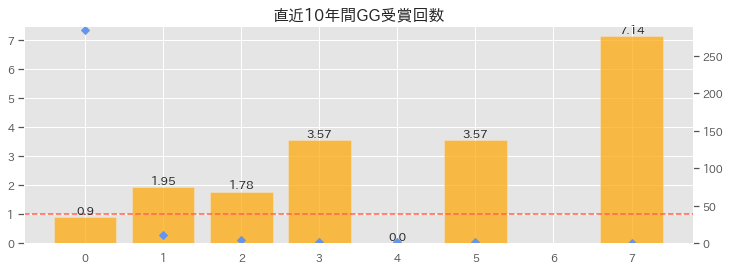

In [15]:
for i in df_ctg.columns:
    df = df_4.groupby(str(i))[['目的変数_ネックレス装着フラグ']].mean()
    df['Lift'] = df['目的変数_ネックレス装着フラグ']/purity
    df['size'] = df_4[i].value_counts()
    df['t_count'] = df_4.groupby(str(i))['目的変数_ネックレス装着フラグ'].sum()
    df = df.reset_index()
    
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(111)

    ax.bar(df[i], df['Lift'], alpha = 0.7, color = 'orange')
    ax.axhline(1, ls = "--", color = "tomato")

    for p, label in zip(ax.patches, df['Lift'].round(2)):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height+0.02 , label,
            ha='center', va='bottom', fontsize = 12)

    ax.set_title(str(i), fontsize = 16)
    
    ax2 = ax.twinx()
    ax2.plot(df[i], df['size'], marker = "D", markerfacecolor = 'cornflowerblue', markeredgecolor = 'cornflowerblue', linewidth = 0)
    ax2.set_ylim([0, max(df['size']+5)])
    ax2.grid(False)

In [16]:
df.columns

Index(['直近10年間GG受賞回数', '目的変数_ネックレス装着フラグ', 'Lift', 'size', 't_count'], dtype='object')

### 連続変数のリフト値算出

In [17]:
df_4.columns

Index(['背番号', '選手名', '守備', '生年月日', '年齢', 'プロ年数', '身長', '体重', '血液型', '投打',
       '出身地', '推定年俸(万円)', '2019年所属球団', '生年年', '生年月', '生年日', '選手名_球団',
       '選手名_生年月日', '出場試合数', '出身地域', '出身校', '高・大フラグ', 'オリックス', 'ソフトバンク', 'ヤクルト',
       'ロッテ', '中日', '巨人', '広島', '日ハム', '楽天', '横浜', '西武', '阪神',
       '直近10年間月間MVP受賞回数', '直近10年間GG受賞回数', '最大所属年数', '最大所属年数球団', 'ネックレス太さ',
       '目的変数_ネックレス装着フラグ', '外国人フラグ', '育成', '2019年セパフラグ', '最大所属年数球団_adj'],
      dtype='object')

In [18]:
#閾値を設定する
def func_age(x):
    if x < 22:
        return '22歳未満'
    elif x >= 22 and x <25:
        return '22歳以上-25歳未満'
    elif x >= 25 and x<27:
        return '25歳以上-27歳未満'
    elif x >= 27 and x < 30:
        return '27歳以上-30歳未満'
    elif x >= 30 and x < 35:
        return '30歳以上-35歳未満'
    elif x >= 35 and x<=43:
        return '35歳以上'
    else:
        return None
    
df_4['年齢_ctg'] = df_4['年齢'].apply(func_age)
df_4['年齢_ctg'].value_counts()

27歳以上-30歳未満    71
22歳以上-25歳未満    65
30歳以上-35歳未満    61
25歳以上-27歳未満    57
22歳未満          30
35歳以上          23
Name: 年齢_ctg, dtype: int64

In [19]:
def func_pro(x):
    if x <2:
        return '1年'
    elif x >=2 and x <5:
        return '2年以上-5年未満'
    elif x >=5 and x <8:
        return '5年以上-8年未満'
    elif x >=8 and x <10:
        return '8年以上-10年未満'
    elif x >=10 and x <15:
        return '10年以上-15年未満'
    else:
        return '15年以上'

df_4['プロ年数_ctg'] = df_4['プロ年数'].apply(func_pro)
df_4['プロ年数_ctg'].value_counts()

2年以上-5年未満      93
5年以上-8年未満      73
10年以上-15年未満    52
8年以上-10年未満     41
1年             30
15年以上          18
Name: プロ年数_ctg, dtype: int64

In [20]:
def func_height(x):
    if x < 170:
        return '170cm未満'
    elif x >=170 and x<175:
        return '170cm以上-175cm未満'
    elif x >=175 and x<180:
        return '175cm以上-180cm未満'
    elif x >=180 and x<185:
        return '180cm以上-185cm未満'
    elif x >=185 and x<190:
        return '185cm以上-190cm未満'
    else:
        return '190cm以上'

df_4['身長_ctg'] = df_4['身長'].apply(func_height)
df_4['身長_ctg'].value_counts()

180cm以上-185cm未満    111
175cm以上-180cm未満    101
185cm以上-190cm未満     39
170cm以上-175cm未満     38
190cm以上             11
170cm未満              7
Name: 身長_ctg, dtype: int64

In [21]:
def func_weight(x):
    if x < 70:
        return '70kg未満'
    elif x >=70 and x<75:
        return '70kg以上-75kg未満'
    elif x >=75 and x<80:
        return '75kg以上-80kg未満'
    elif x >=80 and x<85:
        return '80kg以上-85kg未満'
    elif x >=85 and x<90:
        return '85kg以上-90kg未満'
    else:
        return '90kg以上'

df_4['体重_ctg'] = df_4['体重'].apply(func_weight)
df_4['体重_ctg'].value_counts()

80kg以上-85kg未満    87
85kg以上-90kg未満    68
75kg以上-80kg未満    65
90kg以上           51
70kg以上-75kg未満    26
70kg未満           10
Name: 体重_ctg, dtype: int64

In [22]:
def func_salary(x):
    if x < 500:
        return '500万未満'
    elif x >=500 and x<1000:
        return '500万以上-1000万未満'
    elif x >=1000 and x<2500:
        return '1000万以上-2500万未満'
    elif x >=2500 and x<5000:
        return '2500万以上-5000万未満'
    elif x >=5000 and x<10000:
        return '5000万以上-1億未満'
    else:
        return '1億以上'

df_4['推定年俸(万円)_ctg'] = df_4['推定年俸(万円)'].apply(func_salary)
df_4['推定年俸(万円)_ctg'].value_counts()

1000万以上-2500万未満    117
500万以上-1000万未満      69
5000万以上-1億未満        44
2500万以上-5000万未満     35
1億以上                33
500万未満               9
Name: 推定年俸(万円)_ctg, dtype: int64

In [23]:
def func_games(x):
    if x < 10:
        return '10試合未満'
    elif x >=10 and x<25:
        return '10試合以上-25試合未満'
    elif x >=25 and x<50:
        return '25試合以上-50試合未満'
    elif x >=50 and x<100:
        return '50試合以上-100試合未満'
    else:
        return '100試合以上'

df_4['出場試合数_ctg'] = df_4['出場試合数'].apply(func_games)
df_4['出場試合数_ctg'].value_counts()

10試合未満            87
10試合以上-25試合未満     66
50試合以上-100試合未満    58
25試合以上-50試合未満     58
100試合以上           38
Name: 出場試合数_ctg, dtype: int64

In [24]:
df_cont =  df_4[['年齢_ctg', 'プロ年数_ctg', '身長_ctg', '体重_ctg', '推定年俸(万円)_ctg','出場試合数_ctg']]

In [25]:
df_cont.shape

(307, 6)

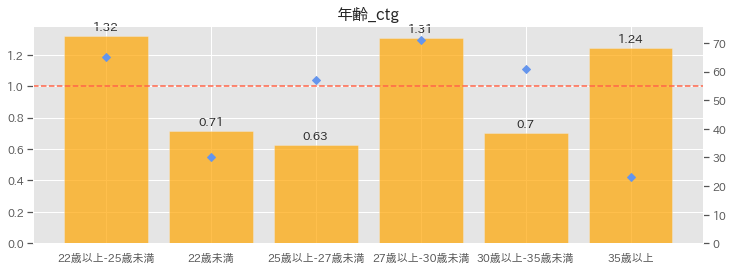

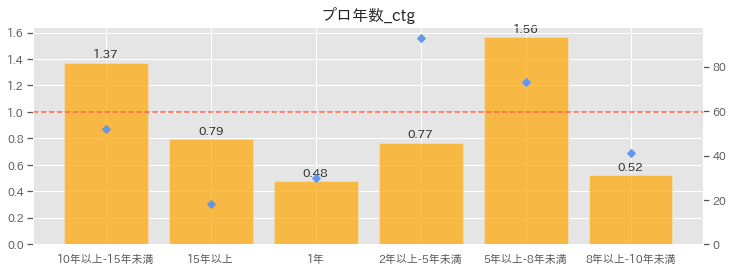

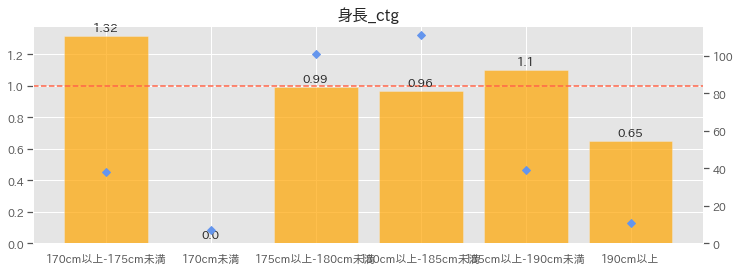

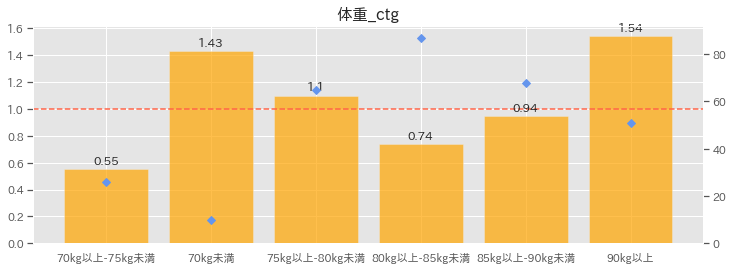

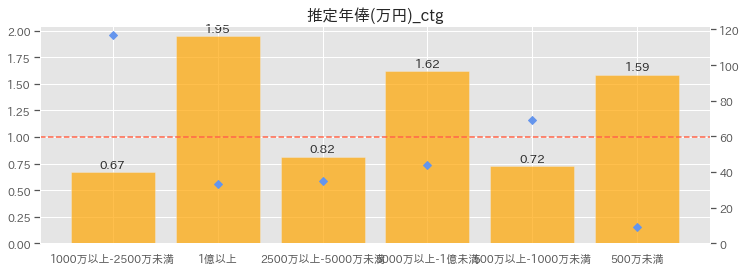

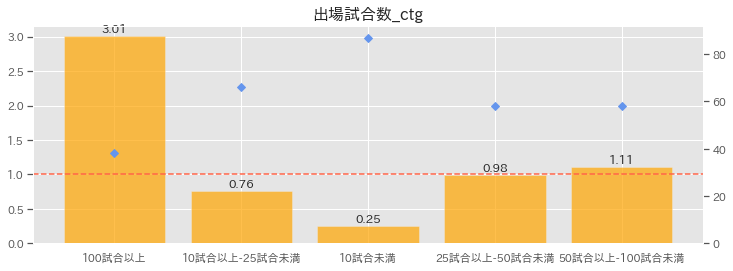

In [27]:
for i in df_cont.columns:
    df = df_4.groupby(str(i))[['目的変数_ネックレス装着フラグ']].mean()
    df['Lift'] = df['目的変数_ネックレス装着フラグ']/purity
    df['size'] = df_4[i].value_counts()
    df['t_count'] = df_4.groupby(str(i))['目的変数_ネックレス装着フラグ'].sum()
    df = df.reset_index()
    
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(111)

    ax.bar(df[i], df['Lift'], alpha = 0.7, color = 'orange')
    ax.axhline(1, ls = "--", color = "tomato")

    for p, label in zip(ax.patches, df['Lift'].round(2)):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height+0.02 , label,
            ha='center', va='bottom', fontsize = 12)

    ax.set_title(str(i), fontsize = 16)
    
    ax2 = ax.twinx()
    ax2.plot(df[i], df['size'], marker = "D", markerfacecolor = 'cornflowerblue', markeredgecolor = 'cornflowerblue', linewidth = 0)
    ax2.set_ylim([0, max(df['size']+5)])
    ax2.grid(False)